**PRAKTIKUM 1**

In [1]:
import numpy as np #Ini mengimpor pustaka NumPy dan memberinya alias np. NumPy adalah pustaka Python yang digunakan untuk bekerja dengan array multidimensi dan operasi matematika yang berkaitan.
import tensorflow_datasets as tfds #  Ini mengimpor pustaka TensorFlow Datasets dan memberinya alias tfds. TensorFlow Datasets adalah pustaka yang menyediakan akses mudah ke berbagai dataset yang umum digunakan dalam machine learning dan pengembangan model deep learning.
import tensorflow as tf # Ini mengimpor pustaka TensorFlow, yang merupakan pustaka utama untuk pengembangan model deep learning.

tfds.disable_progress_bar() # Ini memanggil fungsi disable_progress_bar dari TensorFlow Datasets untuk mematikan bilah kemajuan ketika menggunakan dataset dari TensorFlow Datasets.

In [2]:
import matplotlib.pyplot as plt # digunakan untuk membuat berbagai jenis plot dan visualisasi dalam Python.

def plot_graphs(history, metric): #objek yang berisi data pelatihan model, dan metric adalah metrik yang ingin di plot (misalnya, loss atau akurasi).
  plt.plot(history.history[metric]) #  Ini menggambar perubahan metrik selama pelatihan pada grafik.
  plt.plot(history.history['val_'+metric], '') #  digunakan untuk memplot data metrik validasi. Metrik validasi disimpan dalam objek history dengan awalan 'val_'. Dengan demikian, ini menggambar perubahan metrik validasi yang sesuai dengan argumen metric pada grafik.
  plt.xlabel("Epochs") #  Baris ini memberi label sumbu x pada grafik sebagai "Epochs," yang menunjukkan jumlah epoch atau iterasi pelatihan.
  plt.ylabel(metric) # Ini memberi label sumbu y pada grafik berdasarkan metrik.
  plt.legend([metric, 'val_'+metric]) # Ini menambahkan legenda ke grafik untuk membedakan dua garis yang mewakili metrik pelatihan dan metrik validasi. Legenda ini mencantumkan nama metrik yang sesuai.

In [3]:
dataset, info = tfds.load('imdb_reviews', with_info=True, #Kode ini memuat dataset "imdb_reviews" dari TensorFlow Datasets. with_info=True digunakan untuk mengambil informasi lengkap tentang dataset (seperti metadata), dan as_supervised=True mengambil dataset dalam bentuk pasangan data-label yang sesuai untuk tugas klasifikasi sentimen.
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']  #  Setelah memuat dataset, kode ini membaginya menjadi dua bagian: train_dataset (untuk pelatihan) dan test_dataset (untuk pengujian). Dataset IMDb Reviews terdiri dari dua bagian: data latih dan data uji.

train_dataset.element_spec # Ini digunakan untuk menampilkan spesifikasi elemen (element_spec) dari dataset pelatihan. Hasilnya akan menunjukkan struktur elemen dataset, termasuk tipe data dan bentuknya. Dalam kasus ini, dataset ini berisi pasangan teks dan labelnya (teks ulasan film dan sentimen positif/negatif), sehingga element_spec akan mencakup dua komponen.

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [4]:
for example, label in train_dataset.take(1): # Kode ini menggunakan loop for untuk mengiterasi satu contoh dari dataset pelatihan (train_dataset) menggunakan metode take(1). Metode take(1) digunakan untuk mengambil satu elemen pertama dari dataset.
  print('text: ', example.numpy()) #  Kode ini mencetak teks ulasan dari contoh tersebut. example adalah tensor yang berisi teks ulasan. Dengan menggunakan .numpy(), tensor tersebut diubah menjadi array NumPy dan dicetak.
  print('label: ', label.numpy()) # Kode ini mencetak label yang sesuai dengan contoh tersebut. label adalah tensor yang berisi label sentimen (positif/negatif). Dengan menggunakan .numpy(), tensor tersebut diubah menjadi array NumPy dan dicetak.

text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0


In [5]:
BUFFER_SIZE = 10000 # Variabel ini menentukan ukuran buffer yang akan digunakan saat melakukan pengacakan pada dataset pelatihan sebelum pembuatan batch. Pengacakan berguna untuk memastikan bahwa data dipresentasikan ke dalam model secara acak selama pelatihan.
BATCH_SIZE = 64 # Variabel ini menentukan ukuran batch yang akan digunakan dalam pelatihan. Model akan diperbarui setiap kali batch selesai diproses.

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE) #Ini adalah tahap pra-pemrosesan dataset pelatihan.
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE) # dataset pengujian, hanya dilakukan operasi pembuatan batch dan prefetching. Data pengujian juga dibagi menjadi batch-batch dengan ukuran yang sama, dan prefetching dioptimalkan.

for example, label in train_dataset.take(1): # Ini digunakan untuk mengambil satu batch dari dataset pelatihan. Dalam kasus ini, hanya mengambil satu batch untuk tujuan demonstrasi.
  print('texts: ', example.numpy()[:3]) #Kode ini mencetak tiga teks ulasan pertama dalam batch tersebut. example adalah tensor yang berisi teks ulasan, dan dengan .numpy(), mengonversinya menjadi array NumPy dan mencetak tiga teks ulasan pertama dari batch.
  print() # Ini hanya menambahkan baris kosong untuk pemisah.
  print('labels: ', label.numpy()[:3]) # Kode ini mencetak tiga label sentimen pertama dalam batch tersebut. label adalah tensor yang berisi label sentimen, dan dengan .numpy(), mengonversinya menjadi array NumPy dan mencetak tiga label pertama.


texts:  [b'If Todd Sheets were to come out and admit that this movie was intended to spoof the zombie genre, I would change my rating to an eight. Try to imagine a movie where every scene, line, and even every acting nuance was designed to be a parody. I could probably crap out alphabet soup, rearrange what was left of the letters, and still have a better script. Two scenes in particular come to mind when I think of this movie. SPOILER ALERT! One is when Mike\'s dad and the other dad walk, I repeat walk down a staircase jam packed with zombies. This is a small staircase and even though they brush up against the flailing undead, nothing happens to them. When they reach the end, the ex-marine turns around, says "God you\'re a horny bastard", and shoots only one. The other is in the military complex. The girl stabs a zombie with a machete and is immediately surrounded. The camera moves around her for roughly forty seconds, while she is surrounded by zombies at an arm\'s length away. She t

In [6]:
VOCAB_SIZE = 1000 # Variabel ini menentukan ukuran vocab (kosakata) yang akan digunakan oleh TextVectorization. 1000 Ini adalah ukuran maksimum kosakata yang akan digunakan untuk mengindeks kata-kata dari teks.
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE) # membuat objek TextVectorization dengan menentukan max_tokens yang diatur ke VOCAB_SIZE. TextVectorization ini akan mengonversi teks menjadi representasi numerik.
encoder.adapt(train_dataset.map(lambda text, label: text)) # Ini adalah tahap adaptasi TextVectorization terhadap dataset pelatihan. encoder diajar agar memahami dan membangun indeks kosakata berdasarkan teks yang ada dalam dataset pelatihan. Fungsi adapt digunakan untuk melakukan adaptasi dengan mengambil dataset pelatihan dan hanya mengambil teksnya.

In [7]:
vocab = np.array(encoder.get_vocabulary()) # menggunakan metode get_vocabulary() dari objek encoder untuk mengambil kosakata yang telah dibangun selama tahap adaptasi. Kemudian, dengan np.array(), mengonversi daftar kosakata tersebut menjadi array NumPy.
vocab[:20] # mencetak 20 kata pertama dalam kosakata. Dengan mengindeks array vocab menggunakan [:20].

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

In [8]:
encoded_example = encoder(example)[:3].numpy() # mengambil tiga elemen pertama dari representasi angka yang dihasilkan oleh encoder untuk example. Proses ini dapat memetakan contoh teks menjadi daftar angka yang sesuai dengan kosakata yang telah dibangun. [:3] digunakan untuk memilih tiga elemen pertama dalam representasi ini.
encoded_example # Variabel encoded_example berisi daftar angka yang merupakan hasil pengkodean tiga contoh pertama dari teks menggunakan encoder.

array([[ 45,   1,   1, ...,   0,   0,   0],
       [231,   2, 422, ...,   0,   0,   0],
       [154, 730,   1, ...,   0,   0,   0]])

In [9]:
for n in range(3): # loop for yang akan berjalan tiga kali. Loop ini digunakan untuk mengambil tiga contoh teks pertama dari example dan melakukan operasi yang sama pada masing-masingnya.
  print("Original: ", example[n].numpy()) # mencetak teks asli dari contoh teks. example[n] mengambil teks dari contoh yang sedang diproses, dan .numpy() digunakan untuk mengonversi tensor TensorFlow menjadi bentuk numpy yang dapat dicetak.
  print("Round-trip: ", " ".join(vocab[encoded_example[n]])) # mencetak hasil pemetaan balik dari teks yang telah di-enkoding. encoded_example[n] adalah hasil enkoding dari teks yang dipilih, kemudian menggunakan vocab untuk memetakan angka-angka enkoding ini ke kata-kata teks asli. join digunakan untuk menggabungkan kata-kata dalam sebuah string dengan spasi sebagai pemisah.
  print() # digunakan untuk mencetak baris kosong antara setiap pasangan teks asli dan hasil pemetaan baliknya, sehingga hasilnya lebih mudah dibaca.

Original:  b'If Todd Sheets were to come out and admit that this movie was intended to spoof the zombie genre, I would change my rating to an eight. Try to imagine a movie where every scene, line, and even every acting nuance was designed to be a parody. I could probably crap out alphabet soup, rearrange what was left of the letters, and still have a better script. Two scenes in particular come to mind when I think of this movie. SPOILER ALERT! One is when Mike\'s dad and the other dad walk, I repeat walk down a staircase jam packed with zombies. This is a small staircase and even though they brush up against the flailing undead, nothing happens to them. When they reach the end, the ex-marine turns around, says "God you\'re a horny bastard", and shoots only one. The other is in the military complex. The girl stabs a zombie with a machete and is immediately surrounded. The camera moves around her for roughly forty seconds, while she is surrounded by zombies at an arm\'s length away. She

In [10]:
model = tf.keras.Sequential([
    encoder, # Ini adalah lapisan TextVectorization yang telah dijelaskan sebelumnya. Lapisan ini digunakan untuk mengubah teks menjadi urutan angka yang sesuai dengan kamus kata-kata yang telah diadaptasi.
    tf.keras.layers.Embedding( # ini digunakan untuk mengonversi urutan angka yang dihasilkan oleh encoder menjadi vektor bertipe float. Itu berfungsi sebagai lapisan embedding yang memetakan kata-kata ke vektor dalam ruang fitur yang lebih rendah (dalam hal ini, 64 dimensi).
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)), #  Ini adalah lapisan rekursif (RNN) yang merupakan LSTM (Long Short-Term Memory) yang bidireksional. Lapisan ini dapat memproses urutan data dalam kedua arah, yang membantu dalam memahami konteks teks. Itu memiliki 64 unit LSTM.
    tf.keras.layers.Dense(64, activation='relu'), # Ini adalah lapisan fully connected (dense) dengan 64 unit dan fungsi aktivasi ReLU (Rectified Linear Unit).
    tf.keras.layers.Dense(1) # Ini adalah lapisan fully connected (dense) dengan satu unit. Ini merupakan lapisan keluaran yang menghasilkan skalar sebagai hasil.
])

In [11]:
print([layer.supports_masking for layer in model.layers]) # Kode tersebut digunakan untuk menampilkan apakah setiap lapisan (layer) dalam model untuk mendukung masking. Masking adalah teknik yang digunakan untuk mengatasi panjang sekuens variabel dalam data.

[False, True, True, True, True]


In [12]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.') #  Ini adalah teks yang akan digunakan sebagai input untuk model. Teks ini berisi beberapa kalimat yang menggambarkan pendapat seseorang tentang suatu film.
predictions = model.predict(np.array([sample_text])) # Pada baris ini, memasukkan "sample_text" ke dalam model untuk melakukan prediksi sentimen. "sample_text" dibungkus dalam sebuah array numpy, karena model mengharapkan input dalam bentuk array. Hasil prediksi akan disimpan dalam variabel "predictions".
print(predictions[0]) # Hasil prediksi dari model (kemungkinan sentimen positif) dicetak ke layar. Ini adalah hasil prediksi dalam bentuk angka, yang mewakili sejauh mana model percaya bahwa teks tersebut memiliki sentimen positif. Semakin tinggi nilai ini, semakin besar kepercayaan model terhadap sentimen positif.

1/1 [==============================] - 13s 13s/step
[0.01822097]


In [13]:
padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

#Kode program di atas digunakan untuk menguji model sentimen pada dua teks: "sample_text" dan "padding", di mana "padding" adalah teks yang sangat panjang. Teks "sample_text" adalah teks pendek yang awalnya digunakan untuk menguji model.

1/1 [==============================] - 0s 60ms/step
[0.01822097]


In [14]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), # Digunakan untuk mengukur sejauh mana hasil prediksi model mendekati hasil yang sebenarnya. Dalam hal ini, digunakan BinaryCrossentropy yang merupakan metrik yang cocok untuk tugas klasifikasi biner (dua kelas: positif dan negatif). from_logits=True mengindikasikan bahwa model akan menghasilkan keluaran dalam bentuk "logit" yang kemudian diubah menjadi probabilitas melalui fungsi sigmoid. Log loss dihitung antara probabilitas prediksi dan label sebenarnya.
              optimizer=tf.keras.optimizers.Adam(1e-4), # Digunakan untuk mengatur bagaimana model diperbarui berdasarkan loss function. Dalam kasus ini, digunakan Adam optimizer dengan laju pembelajaran (learning rate) sebesar 1e-4. Optimizer ini akan mengoptimalkan parameter model agar loss function minimal.
              metrics=['accuracy']) #Digunakan untuk mengukur kinerja model selama pelatihan dan evaluasi. Dalam kode ini, digunakan metrik akurasi (accuracy), yang akan memberikan informasi tentang sejauh mana model benar-benar mengklasifikasikan data dengan benar.

In [15]:
history = model.fit(train_dataset, epochs=10, # model.fit(): Metode ini digunakan untuk melatih model. Ini akan mengeksekusi beberapa epoch (iterasi) di atas data pelatihan untuk mengoptimalkan. train_dataset: parameter-model. Dalam kasus ini, dilakukan pelatihan selama 10 epoch. epochs=10: Ini mengatur jumlah epoch yang akan dijalankan selama pelatihan. Dalam hal ini, pelatihan akan dilakukan selama 10 epoch.
                    validation_data=test_dataset, # Data validasi yang digunakan untuk mengevaluasi model selama pelatihan. Model akan dievaluasi pada data ini setiap akhir epoch untuk memantau kinerja model pada data yang tidak digunakan selama pelatihan.
                    validation_steps=30) # umlah langkah yang akan dijalankan selama validasi. Dalam hal ini, model akan dievaluasi pada 30 batch dari data validasi. Jumlah langkah validasi ini dapat membantu dalam memantau kinerja model selama pelatihan tanpa harus mengevaluasi seluruh data validasi setiap epoch.

Epoch 1/10
391/391 [==============================] - 50s 100ms/step - loss: 0.6464 - accuracy: 0.5630 - val_loss: 0.5143 - val_accuracy: 0.6865
Epoch 2/10
391/391 [==============================] - 25s 63ms/step - loss: 0.4024 - accuracy: 0.8152 - val_loss: 0.3662 - val_accuracy: 0.8469
Epoch 3/10
391/391 [==============================] - 23s 57ms/step - loss: 0.3399 - accuracy: 0.8514 - val_loss: 0.3506 - val_accuracy: 0.8339
Epoch 4/10
391/391 [==============================] - 23s 58ms/step - loss: 0.3232 - accuracy: 0.8594 - val_loss: 0.3372 - val_accuracy: 0.8516
Epoch 5/10
391/391 [==============================] - 23s 59ms/step - loss: 0.3162 - accuracy: 0.8640 - val_loss: 0.3282 - val_accuracy: 0.8521
Epoch 6/10
391/391 [==============================] - 22s 56ms/step - loss: 0.3076 - accuracy: 0.8667 - val_loss: 0.3340 - val_accuracy: 0.8495
Epoch 7/10
391/391 [==============================] - 24s 60ms/step - loss: 0.3063 - accuracy: 0.8695 - val_loss: 0.3249 - val_accuracy

In [16]:
test_loss, test_acc = model.evaluate(test_dataset) # digunakan untuk mengevaluasi model pada dataset tes yang diberikan. Evaluasi ini akan menghitung loss dan akurasi model pada dataset tes.
#  kemudian nilai loss dari evaluasi tersebut disimpan dalam variabel test_loss, sedangkan nilai akurasi disimpan dalam variabel test_acc.
print('Test Loss:', test_loss) # mencetak nilai loss dari evaluasi model pada dataset tes.
print('Test Accuracy:', test_acc) # mencetak nilai akurasi dari evaluasi model pada dataset tes.

391/391 [==============================] - 11s 28ms/step - loss: 0.3156 - accuracy: 0.8611
Test Loss: 0.31563234329223633
Test Accuracy: 0.8610799908638


In [17]:
sample_text = ('The movie was not good. The animation and the graphics '
'were terrible. I would not recommend this movie.')
predictions = model.predict(np.array([sample_text])) # melakukan prediksi pada contoh teks tersebut. Metode predict menerima input berupa array, sehingga kita perlu mengubah contoh teks menjadi array menggunakan np.array([sample_text]).
print(predictions) # mencetak hasil prediksi tersebut.

1/1 [==============================] - 2s 2s/step
[[-1.3238065]]


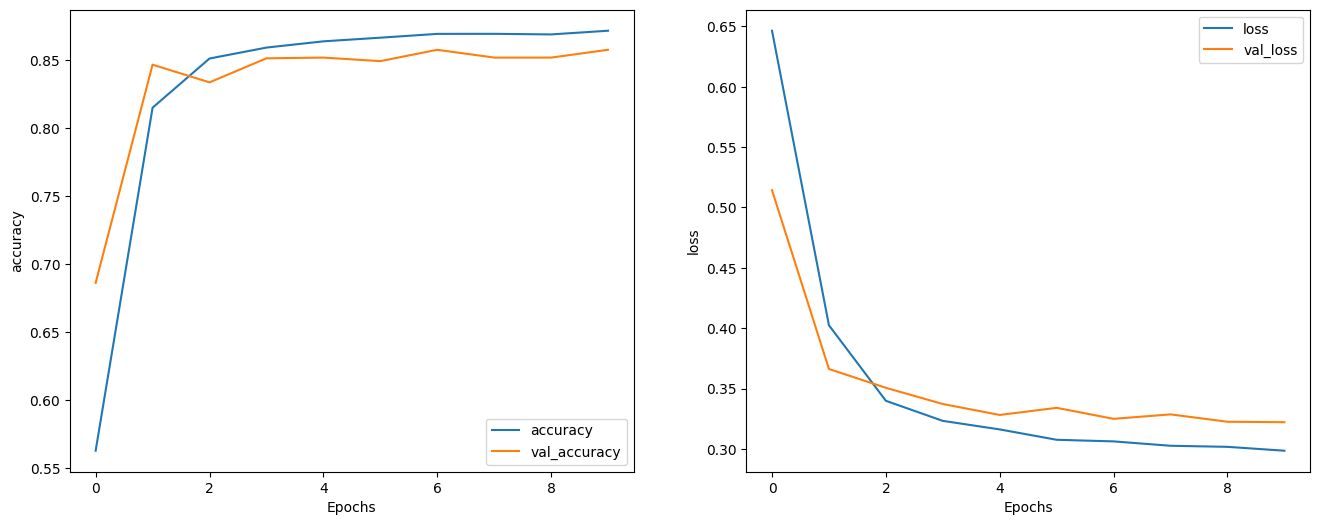

In [18]:
plt.figure(figsize=(16, 6)) # membuat sebuah figure dengan ukuran 16x6 untuk menampung kedua subplot.
plt.subplot(1, 2, 1) #  membuat subplot pertama dengan konfigurasi (1 row, 2 kolom) dan mengatur fokus pada subplot pertama.
plot_graphs(history, 'accuracy') # memanggil fungsi plot_graphs dengan parameter history yang merupakan objek yang berisi informasi akurasi dari pelatihan model. Fungsi ini akan menggambar grafik akurasi dari pelatihan model pada subplot pertama.
plt.subplot(1, 2, 2) # membuat subplot kedua dengan konfigurasi yang sama seperti sebelumnya dan mengatur fokus pada subplot kedua.
plot_graphs(history, 'loss') # memanggil fungsi plot_graphs dengan parameter history yang merupakan objek yang berisi informasi loss dari pelatihan model. Fungsi ini akan menggambar grafik loss dari pelatihan model pada subplot kedua.

**PRAKTIKUM 2**

In [19]:
import tensorflow as tf
import numpy as np
import os
import time

In [20]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')
# Fungsi get_file dari TensorFlow.keras.utils digunakan untuk mengunduh file dari URL dan menyimpannya di lokasi yang diberikan. Dalam hal ini, kita menyimpan file dengan nama 'shakespeare.txt' dari URL 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt'. Fungsi ini juga mengembalikan path lokasi lokal tempat file disimpan.

1115394/1115394 [==============================] - 0s 0us/step


In [21]:
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')

#Kode ini membuka dan membaca file yang ditentukan, kemudian mengonversi isinya menjadi teks dengan pengkodean utf-8. Panjang teks (dalam karakter) kemudian dicetak.
#Hal ini berguna untuk mengetahui seberapa besar dataset teks yang akan digunakan.

Length of text: 1115394 characters


In [22]:
# Take a look at the first 250 characters in text
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [23]:
# The unique characters in the file
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

#Kode ini menghitung dan mencetak jumlah karakter unik dalam teks. Ini memberikan informasi tentang variasi karakter yang digunakan dalam teks tersebut.
#Semakin banyak karakter unik, semakin kompleks teksnya.

65 unique characters


In [24]:
# Print unique characters
for char in vocab:
    print(char, end=' ')
#Kode ini melakukan loop melalui setiap karakter unik dalam teks dan mencetaknya secara berurutan dalam satu baris



   ! $ & ' , - . 3 : ; ? A B C D E F G H I J K L M N O P Q R S T U V W X Y Z a b c d e f g h i j k l m n o p q r s t u v w x y z 

In [25]:
example_texts=['abcdefg','xyz']
chars=tf.strings.unicode_split(example_texts,input_encoding='UTF-8')
chars #Menghasilkan output dari operasi sebelumnya, yaitu kumpulan karakter Unicode yang telah dipecah.


<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [26]:
ids_from_chars=tf.keras.layers.StringLookup(vocabulary=list(vocab),mask_token=None)
#Kode ini mendefinisikan lapisan StringLookup yang akan mengonversi karakter-karakter dalam teks menjadi ID numerik berdasarkan kamus karakter unik yang telah ditentukan sebelumnya


In [27]:
ids=ids_from_chars(chars)
ids #Kode ini mengonversi karakter-karakter Unicode menjadi ID numerik menggunakan lapisan StringLookup dan menyimpan hasilnya dalam variabel ids.


<tf.RaggedTensor [[40, 41, 42, 43, 44, 45, 46], [63, 64, 65]]>

In [28]:
chars_from_ids = tf.keras.layers.StringLookup(vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)
#Kode ini membuat lapisan StringLookup baru yang akan digunakan untuk mengonversi ID numerik kembali ke karakter aslinya

In [31]:
chars=chars_from_ids(ids) # menginisialisasi variabel chars dengan nilai yang dikembalikan oleh pemanggilan fungsi chars_from_ids() dengan argumen ids. Fungsi ini tampaknya merupakan suatu fungsi yang mengkonversi id-id karakter menjadi karakter-karakter yang sesuai.
chars # mencetak nilai dari variabel chars. Jadi, setelah fungsi chars_from_ids() dieksekusi dan nilai dikembalikan, karakter-karakter yang dikonversi akan ditampilkan di sini.

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [32]:
tf.strings.reduce_join(chars,axis=-1).numpy()
#Kode ini menggabungkan karakter-karakter Unicode dalam chars untuk membentuk string tunggal, dan kemudian mengonversi hasilnya menjadi array NumPy.

array([b'abcdefg', b'xyz'], dtype=object)

In [33]:
def text_from_ids(ids):
    return tf.strings.reduce_join(chars_from_ids(ids), axis=-1) #mengonversi ID numerik kembali menjadi karakter, kemudian menggabungkannya menjadi sebuah string menggunakan operasi reduce join.

In [34]:
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
all_ids
# ids_from_chars() fungsi untul ambil tensor yang berisi kode unicode
# tf.strings.unicode_split(text, 'UTF-8') untuk bagi string 'text' jadi unicode dg UTF-8

<tf.Tensor: shape=(1115394,), dtype=int64, numpy=array([19, 48, 57, ..., 46,  9,  1])>

In [35]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)
#buat dataset dari all_ids

In [36]:
for ids in ids_dataset.take(10): #loop untuk ambil 10 elemen pertama dataset ids_dataset
    print(chars_from_ids(ids).numpy().decode('utf-8')) #ambil elemen ids, terus konversi jadi karakter pake fungsi chars_from_ids(ids), setelah itu konversi karakter lagi jadi string pake numpy().decode('utf-8')

F
i
r
s
t
 
C
i
t
i


In [37]:
seq_length = 100
# nilai 100 diberikan kepada variabel seq_length. Variabel ini kemungkinan digunakan untuk menentukan panjang dari urutan dalam salah satu bagian dari kode.

In [38]:
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)
#gabungi ID jadi sekuens dengan panjang 101,
#drop_remainder=True mengindikasikan bahwa jika panjang ID tidak habis dibagi oleh seq_length + 1, maka elemen yang tersisa akan dihapus
for seq in sequences.take(1): #ambil satu sekuenes /batch
  print(chars_from_ids(seq)) #cetak karakter

tf.Tensor(
[b'F' b'i' b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':'
 b'\n' b'B' b'e' b'f' b'o' b'r' b'e' b' ' b'w' b'e' b' ' b'p' b'r' b'o'
 b'c' b'e' b'e' b'd' b' ' b'a' b'n' b'y' b' ' b'f' b'u' b'r' b't' b'h'
 b'e' b'r' b',' b' ' b'h' b'e' b'a' b'r' b' ' b'm' b'e' b' ' b's' b'p'
 b'e' b'a' b'k' b'.' b'\n' b'\n' b'A' b'l' b'l' b':' b'\n' b'S' b'p' b'e'
 b'a' b'k' b',' b' ' b's' b'p' b'e' b'a' b'k' b'.' b'\n' b'\n' b'F' b'i'
 b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':' b'\n' b'Y'
 b'o' b'u' b' '], shape=(101,), dtype=string)


In [39]:
for seq in sequences.take(5): #ambil 5 sekuens pertama
    print(text_from_ids(seq).numpy()) #cetak teks yang mana diambil sekuens ID dulu terus dikeonversi jadi teks

b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
b'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
b"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
b"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
b'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [40]:
def split_input_target(sequence):
  input_text = sequence[:-1] #ambil semua elemen kecuali elemen terakhir dai sekuens
  target_text = sequence[1:] #ambil semua elmeen kecuali elemen pertama dari sekuens
  return input_text, target_text #mengembalikan nilai

In [41]:
split_input_target(list("Tensorflow")) #bagi sequence jadi 2, input (Tensorflo) dan target (ensorflow)

(['T', 'e', 'n', 's', 'o', 'r', 'f', 'l', 'o'],
 ['e', 'n', 's', 'o', 'r', 'f', 'l', 'o', 'w'])

In [42]:
dataset = sequences.map(split_input_target) #mapping sekuens dalam dataset ke pasangan input dan target

In [43]:
for input_example, target_example in dataset.take(1):
  print("Input :", text_from_ids(input_example).numpy()) #cetak label input, text_from_ids(input_example) mengonversi input_example, yang berisi sekuens ID, kembali menjadi teks, dan .numpy() mengubah hasilnya menjadi string yang dapat dicetak.
  print("Target:", text_from_ids(target_example).numpy())#cetak label target, text_from_ids(target_example) mengonversi target_example, yang berisi sekuens ID target, kembali menjadi teks, dan .numpy() mengubah hasilnya menjadi string yang dapat dicetak.


Input : b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target: b'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


In [44]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE) #acak elemen
    .batch(BATCH_SIZE, drop_remainder=True) #mengelompokkan elemen dataset menjadi batch
    .prefetch(tf.data.experimental.AUTOTUNE))#mengoptimalkan proses memuat data

dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

In [45]:
# Length of the vocabulary in StringLookup Layer
vocab_size = len(ids_from_chars.get_vocabulary())

# The embedding dimension
embedding_dim = 256 #jumlah embedding untuk represntasi vektor karakter

# Number of RNN units
rnn_units = 1024 #jumlah unit dalam RNN

In [46]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states #mengembalikan urutan karakter yang diprediksi serta status terakhir RNN.
    else:
      return x #hanya akan mengembalikan urutan karakter yang diprediksi

In [47]:
model = MyModel(
    vocab_size=vocab_size, #menentukan seberapa banyak karakter yang ada dalam vokabulari yang digunakan oleh model
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [48]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch) #membuat prediksi dengan memberikan input_example_batch sebagai input. Hasilnya adalah example_batch_predictions, yang akan berisi prediksi model
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 66) # (batch_size, sequence_length, vocab_size)


In [49]:
model.summary() #cetak ringkasan (summary) dari model TensorFlow.

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     multiple                  16896     
                                                                 
 gru (GRU)                   multiple                  3938304   
                                                                 
 dense_2 (Dense)             multiple                  67650     
                                                                 
Total params: 4022850 (15.35 MB)
Trainable params: 4022850 (15.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
sampled_indices = tf.random.categorical(example_batch_predictions[0],num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy() #untuk menghapus dimensi tambahan dan menghasilkan tensor satu dimensi yang berisi indeks karakter yang diambil secara acak dan mengambil data kemudian dikonversi jadi array numpy

In [51]:
sampled_indices # indeks karakter yang diambil secara acak dari prediksi model untuk satu contoh dalam batch

array([62, 44,  3,  7, 39, 29,  0, 59, 16, 22, 12,  0,  1, 27, 62, 16, 13,
        3, 37,  6, 29, 65, 55, 55,  5, 43, 32, 42, 33,  5, 40, 40, 45, 52,
       22, 64, 44, 33, 24, 25, 61, 16, 11, 47, 39, 12, 54, 24, 28, 58, 33,
       54, 59, 49, 45, 37, 64, 30, 14,  4, 22, 57, 47, 18, 43, 65, 58,  4,
       15, 62, 60, 30, 63, 48, 47, 47, 44, 44, 23,  5,  3, 65, 59, 37,  8,
       45, 38, 65, 42, 19, 34, 16, 61, 25,  3,  3,  5, 52, 56, 63])

In [52]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())
#Kode ini digunakan untuk mencetak teks dari input dan prediksi karakter selanjutnya dari model. Ini memberikan gambaran visual tentang bagaimana model bekerja dan seberapa baik dalam memprediksi karakter selanjutnya.

Input:
 b' have you dance.\n\nROMEO:\nNot I, believe me: you have dancing shoes\nWith nimble soles: I have a soul '

Next Char Predictions:
 b"we!,ZP[UNK]tCI;[UNK]\nNwC?!X'Pzpp&dScT&aafmIyeTKLvC:hZ;oKOsTotjfXyQA$IrhEdzs$BwuQxihheeJ&!ztX-fYzcFUCvL!!&mqx"


In [53]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
#Kode ini menginisialisasi fungsi kerugian yang akan digunakan selama pelatihan model.
#Fungsi kerugian yang dipilih adalah SparseCategoricalCrossentropy, yang sesuai untuk tugas klasifikasi.
#Pengaturan from_logits=True menunjukkan bahwa model akan mengeluarkan nilai logits sebagai output akhir.

In [54]:
example_batch_mean_loss = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", example_batch_mean_loss)
#Kode ini menghitung dan mencetak informasi tentang hasil prediksi dan kerugian pada sebuah batch dari data uji. Informasi ini berguna untuk memonitor dan mengevaluasi kinerja model selama pelatihan.

Prediction shape:  (64, 100, 66)  # (batch_size, sequence_length, vocab_size)
Mean loss:         tf.Tensor(4.1894627, shape=(), dtype=float32)


In [55]:
tf.exp(example_batch_mean_loss).numpy()
#Kode ini menghasilkan nilai eksponensial dari example_batch_mean_loss dan mengonversinya menjadi array NumPy.

65.98733

In [56]:
model.compile(optimizer='adam', loss=loss)
#Kode ini mengatur pengaturan pelatihan untuk model.
#Optimizer 'adam' akan digunakan untuk mengoptimalkan bobot model, dan fungsi kerugian loss akan digunakan untuk mengukur seberapa baik model memprediksi target selama pelatihan.

In [57]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)
#Kode ini menentukan cara untuk menyimpan checkpoint selama pelatihan model.

In [58]:
EPOCHS = 20

In [59]:
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])
#Kode ini melatih model menggunakan data dari dataset selama sejumlah epoch yang telah ditentukan, sambil menggunakan callback untuk melakukan tindakan tambahan seperti menyimpan model.

Epoch 1/20
172/172 [==============================] - 15s 57ms/step - loss: 2.7081
Epoch 2/20
172/172 [==============================] - 12s 57ms/step - loss: 1.9804
Epoch 3/20
172/172 [==============================] - 12s 58ms/step - loss: 1.7014
Epoch 4/20
172/172 [==============================] - 11s 56ms/step - loss: 1.5421
Epoch 5/20
172/172 [==============================] - 11s 56ms/step - loss: 1.4458
Epoch 6/20
172/172 [==============================] - 11s 55ms/step - loss: 1.3781
Epoch 7/20
172/172 [==============================] - 12s 55ms/step - loss: 1.3258
Epoch 8/20
172/172 [==============================] - 12s 55ms/step - loss: 1.2809
Epoch 9/20
172/172 [==============================] - 11s 56ms/step - loss: 1.2391
Epoch 10/20
172/172 [==============================] - 11s 56ms/step - loss: 1.1986
Epoch 11/20
172/172 [==============================] - 11s 55ms/step - loss: 1.1583
Epoch 12/20
172/172 [==============================] - 11s 56ms/step - loss: 1.1156
E

In [60]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

In [61]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

In [62]:
start = time.time() #Memulai penghitungan waktu dengan menyimpan timestamp awal di variabel start.
states = None
next_char = tf.constant(['ROMEO:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)
#Kode ini menggunakan model one_step_model untuk menghasilkan teks berkelanjutan berdasarkan teks awal "ROMEO:".
#Proses ini dilakukan dalam loop sebanyak 1000 kali.
#Hasil akhir dari teks yang dihasilkan akan dicetak bersama dengan waktu yang diperlukan untuk operasi tersebut.

ROMEO:
Good morrow, yea, my trifle.

Poor:
Here is the equeen?

Fathwerg: they say there is no trouble this!
Is strain thee ben? imprison in me
To have me sound to do so sweet a scandage. You have to have no vicestions,
Yielded up unto the crown?

ISABELLA:
So.

AEdices, madam have been so unnatural as
I see the king is sworn by nothing.

LEONTES:
No.

BRUTUS:
Woe teaches she? What?

Lords:
To take off proud sacins and courtesy,
What should you dishonour miles in many a tood as they
Have left me thus to lie another. Who is there?

BAPTISTA:
As thou hast done! The other Guiracle,
the heavens have and rotten story would going
As an ifleconer, that is good,
With teezarry at the victory,
Forbid the crown to me that our winns, and the
dreadful prince fash, as to rise,
Which I, my liege, if Henry told something hard
holding up in affaction.

MENENIUS:
Sir, if it be in rage with a beast.
O Dreasf, talk:
If you would stay his warlike queen,
To fight the tenge that plead for his country:
Whom w

In [64]:
start = time.time() #Memulai penghitungan waktu dengan menyimpan timestamp awal di variabel start.
states = None
next_char = tf.constant(['ROMEO:', 'ROMEO:', 'ROMEO:', 'ROMEO:', 'ROMEO:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result, '\n\n' + '_'*80)
print('\nRun time:', end - start)
#Kode ini menggunakan model one_step_model untuk menghasilkan teks berkelanjutan berdasarkan teks awal yang telah ditentukan.
#Proses ini dilakukan dalam loop sebanyak 1000 kali.
#Hasil akhir dari teks yang dihasilkan akan dicetak bersama dengan waktu yang diperlukan untuk operasi tersebut.


tf.Tensor(
[b"ROMEO:\nVery well.\n\nKING EDWARD IV:\nTo every ore I have been meddled, to wash your\nhalfest sorrow. Take up your garden, to\nAngelo; you shall not safely in Vienna\nAnd here I hate on with fierce befal ty\nexorance, distance; he hath a taught both\nyour grace to do it only.\n\nMENENIUS:\nAnd born we do,\nSo cunst the suit I'll tell you what of dood:\nIf either you by hail to Mantua.\n\nROMEO:\nAnd I'll no grave where go with her graves,\nMy tongue bless, I know how hast a churchyard.\n\nGREY:\nI am a hoar, yea, as he wades at act.\n\nRICHARD:\nProvides me; that I saw her by his voices,\nThey pause against the orish me.\nBut, most heartily!\n\nPROSPERO:\nMy grantay?\n\nLUCENTIO:\nBut since our humble means to come home must were to\ncus him visit a head o'er-run her.\n\nPETRUCHI\nS:\nAnd she comes for the weal't.\n\nCORIOLANUS:\nMake protest\nPity go along alone.\n\nPage:\nMy lord, such life what sing betrixing\nDress then on their pointed sight,\nBut not upans may be w

In [65]:
tf.saved_model.save(one_step_model, 'one_step')
one_step_reloaded = tf.saved_model.load('one_step')
#Kode ini menyimpan model one_step_model ke dalam format saved model dengan nama direktori 'one_step'. Kemudian, model tersebut dimuat kembali dan disimpan dalam variabel one_step_reloaded untuk penggunaan selanjutnya.


In [66]:
states = None #menyimpan keadaan internal dari model
next_char = tf.constant(['ROMEO:']) #dengan teks awal 'ROMEO:' yang akan digunakan sebagai awal untuk menghasilkan teks berikutnya.
result = [next_char]

for n in range(100):
  next_char, states = one_step_reloaded.generate_one_step(next_char, states=states)
  result.append(next_char)

print(tf.strings.join(result)[0].numpy().decode("utf-8"))
#Kode ini menggunakan model yang telah dilatih untuk menghasilkan teks berkelanjutan berdasarkan teks awal "ROMEO:". Proses ini dilakukan dalam loop sebanyak 100 kali. Hasil akhir dari teks yang dihasilkan akan dicetak.


ROMEO:
The people cry you a sign of kings. Farewell: it is not so.
Of Mortime, purchase whilst I go.

QULE
